# 🚢 kaggle **Titanic**

![파이썬 설치 파일 다운로드](../assets/images/kaggle_titanic/kaggle01.png)


![파이썬 설치 파일 다운로드](../assets/images/kaggle_titanic/kaggle02.png)

![파이썬 설치 파일 다운로드](../assets/images/kaggle_titanic/kaggle03.png)

## 🚢 타이타닉 데이터셋 컬럼 설명

캐글 타이타닉 데이터셋(`train.csv` 및 `test.csv`)의 각 컬럼(열)은 승객의 특징과 생존 여부를 나타내는 **특성**(Feature)을 의미하며, 다음과 같이 분류하여 설명할 수 있습니다.

---

### 1. 🎯 목표 변수 (Target Variable)

이 특성은 우리가 **예측하고자 하는 값**입니다.

| 컬럼명 | 설명 | 데이터 타입 | 비고 |
| :--- | :--- | :--- | :--- |
| **Survived** | 생존 여부 | 정수형 (int) | `1`은 **생존**, `0`은 **사망**을 의미합니다. (`train.csv`에만 존재) |

---

### 2. 👤 개인 정보 특성 (Identity Features)

이 특성들은 승객의 **개인적인 신원**을 나타냅니다.

| 컬럼명 | 설명 | 데이터 타입 | 비고 |
| :--- | :--- | :--- | :--- |
| **PassengerId** | 승객 고유 식별 번호 | 정수형 (int) | 데이터 분석에서는 보통 사용되지 않는 식별자입니다. |
| **Name** | 승객 이름 | 문자열 (str) | 이름 안에 포함된 호칭(Mr., Mrs., Miss, Master 등)은 유용한 특성으로 추출될 수 있습니다. |
| **Sex** | 성별 | 문자열 (str) | `male` 또는 `female`로 구분됩니다. 성별은 생존에 매우 큰 영향을 미치는 것으로 알려져 있습니다. |
| **Age** | 나이 | 실수형 (float) | 결측치가 많으며, 아동(Master) 여부 등 생존에 영향을 미치는 중요한 특성입니다. |

---

### 3. 🎫 객실/운항 관련 특성 (Socio-Economic/Travel Features)

이 특성들은 승객의 **경제적 지위** 및 **여행 정보**와 관련되어 있습니다.

| 컬럼명 | 설명 | 데이터 타입 | 비고 |
| :--- | :--- | :--- | :--- |
| **Pclass** | 객실 등급 (Passenger Class) | 정수형 (int) | `1` (1등석), `2` (2등석), `3` (3등석)을 나타냅니다. 등급은 생존에 중요한 영향을 미칩니다. |
| **SibSp** | 함께 탑승한 형제/배우자 수 (Siblings/Spouses) | 정수형 (int) | 승객이 타이타닉에 동승한 형제 또는 배우자의 총 수입니다. |
| **Parch** | 함께 탑승한 부모/자녀 수 (Parents/Children) | 정수형 (int) | 승객이 타이타닉에 동승한 부모 또는 자녀의 총 수입니다. |
| **Ticket** | 티켓 번호 | 문자열 (str) | 복잡한 규칙을 가지고 있으며, 티켓 번호의 패턴을 이용해 분석하기도 합니다. |
| **Fare** | 운임 | 실수형 (float) | 승객이 지불한 요금입니다. 등급(`Pclass`)과 강한 연관이 있습니다. |
| **Cabin** | 객실 번호 | 문자열 (str) | 결측치가 매우 많습니다. 객실 번호의 **첫 글자** (Deck)는 객실 위치를 나타내 생존에 영향을 줄 수 있습니다. |
| **Embarked** | 탑승지 | 문자열 (str) | 승객이 탑승한 항구입니다. **C** (Cherbourg), **Q** (Queenstown), **S** (Southampton)로 구분됩니다. |

---

### 🔍 데이터 분석에서의 활용 요약

이 컬럼들 중에서 특히 `Pclass`, `Sex`, `Age`, 그리고 가족 정보(`SibSp` + `Parch`로 만든 **가족 규모** 특성)는 **생존(`Survived`)** 예측 모델을 구축하는 데 있어 **가장 중요한 특성**으로 간주됩니다. 나머지 특성들은 결측치 처리, 문자열 변환(인코딩), 또는 다른 특성과 결합하는 **특성 공학(Feature Engineering)** 과정을 거쳐 분석에 활용됩니다.

In [1]:
import pandas as pd

In [2]:
# 데이터 로드
df = pd.read_csv("../data/train.csv") # 데이터프레임(DataFrame)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
# 데이터 상위 5개 행 확인
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# 행(승객 수)과 열의 개수 확인
df.shape

(891, 12)

In [5]:
# 데이터프레임 기본 정보 확인 (결측치, 타입 등)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


##### **1. 데이터프레임 기본 정보**

* **`<class 'pandas.core.frame.DataFrame'>`:** 현재 다루는 객체가 Pandas의 **데이터프레임** 클래스임을 명시합니다.
* **`RangeIndex: 891 entries, 0 to 890`:**
    * 데이터프레임의 **총 행(관측치) 개수**는 **891개**입니다.
    * 인덱스는 0부터 890까지의 정수 범위(`RangeIndex`)로 설정되어 있음을 나타냅니다.
* **`Data columns (total 12 columns)`:** 데이터프레임은 총 **12개**의 열을 포함하고 있습니다.
* **Non-Null Count (결측치):** 총 행 개수(891개)와 `Non-Null Count`가 다를 경우, 해당 열에는 **결측치** (Missing Values)가 존재합니다.
    * **Age:** 891개 중 **714개**만 유효하므로, **177개**의 결측치가 존재합니다.
    * **Cabin:** 891개 중 **204개**만 유효하므로, **687개**의 결측치가 존재합니다. 결측치가 **매우 많습니다**.
    * **Embarked:** 891개 중 **889개**만 유효하므로, **2개**의 결측치가 존재합니다.

---

##### **2. 데이터 타입 요약**

* **`dtypes: float64(2), int64(5), object(5)`:**
    * **float64 (실수): 2개** (Age, Fare)
    * **int64 (정수): 5개** (PassengerId, Survived, Pclass, SibSp, Parch)
    * **object (문자열/혼합): 5개** (Name, Sex, Ticket, Cabin, Embarked)

---

##### **3. 메모리 사용량**

* **`memory usage: 83.7+ KB`:**
    * 데이터프레임이 사용하는 총 메모리 크기는 약 **83.7 KB** 이상임을 나타냅니다. `+` 표시는 모든 열에 대한 메모리 사용량이 정확하게 계산되지 않았을 수 있음을 의미합니다.

---

##### **4. 결론 및 향후 처리 방향**

이 분석 결과는 데이터 전처리를 위한 **중요한 근거**가 됩니다.

1.  **결측치 처리 필요:** **Age**, **Cabin**, **Embarked** 열에는 결측치가 존재하므로, 데이터 분석 전에 이들을 대체하거나 제거하는 **결측치 처리 과정**이 필수적입니다. 특히 `Cabin` 열은 결측치의 비율이 높으므로, 해당 열을 아예 분석에서 제외할지 여부를 신중하게 결정해야 합니다.
2.  **데이터 타입 확인:** `Survived`나 `Pclass`와 같이 정수형으로 되어 있지만 범주형으로 사용될 수 있는 열의 경우, 필요에 따라 **범주형(Categorical)** 타입으로 변환을 고려할 수 있습니다.

In [6]:
import matplotlib.pyplot as plt

### 객실 등급별 인원수

(array([216.,   0.,   0.,   0.,   0., 184.,   0.,   0.,   0., 491.]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. ]),
 <BarContainer object of 10 artists>)

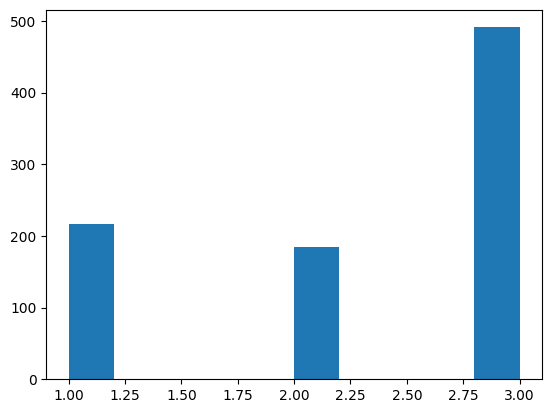

In [7]:
plt.hist(df['Pclass'])

In [8]:
# 생존자
df_survived = df[df['Survived']==1]
df_survived

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,NaN,C
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


(array([[216.,   0.,   0.,   0.,   0., 184.,   0.,   0.,   0., 491.],
        [136.,   0.,   0.,   0.,   0.,  87.,   0.,   0.,   0., 119.]]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. ]),
 <a list of 2 BarContainer objects>)

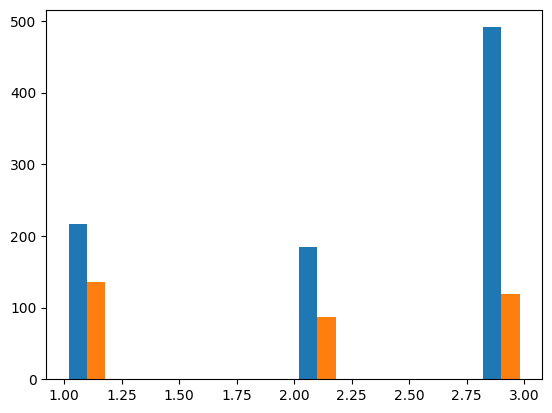

In [9]:
plt.hist([df['Pclass'], df_survived['Pclass']])

In [10]:
survived_male = df[(df['Survived']==1) & (df['Sex']=='male')]
survived_male

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
21,22,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,D56,S
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S
36,37,1,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.2292,NaN,C
55,56,1,1,"Woolner, Mr. Hugh",male,NaN,0,0,19947,35.5000,C52,S
...,...,...,...,...,...,...,...,...,...,...,...,...
838,839,1,3,"Chip, Mr. Chang",male,32.0,0,0,1601,56.4958,NaN,S
839,840,1,1,"Marechal, Mr. Pierre",male,NaN,0,0,11774,29.7000,C47,C
857,858,1,1,"Daly, Mr. Peter Denis",male,51.0,0,0,113055,26.5500,E17,S
869,870,1,3,"Johnson, Master. Harold Theodor",male,4.0,1,1,347742,11.1333,NaN,S


In [11]:
survived_female = df[(df['Survived']==1) & (df['Sex']=='female')]
survived_female

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
874,875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28.0,1,0,P/PP 3381,24.0000,NaN,C
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,NaN,C
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S


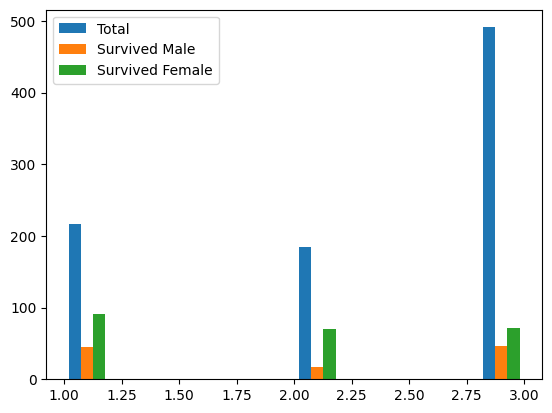

In [12]:
plt.hist([df['Pclass'], survived_male['Pclass'], survived_female['Pclass']])
plt.legend(['Total', 'Survived Male', 'Survived Female'])

### 성별에 따른 생존율 분석

In [13]:
# 성별로 그룹화(groupby)하여 생존율(Survived의 평균)을 계산합니다.
survival_by_sex = df.groupby('Sex')['Survived'].mean().reset_index()
survival_by_sex['Survived'] = (survival_by_sex['Survived'] * 100).round(2)
survival_by_sex

,Sex,Survived
0,female,74.20
1,male,18.89


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# 한글 폰트 설정을 위한 코드 (Colab 환경 등에서 한글 깨짐 방지)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False # 마이너스 기호 깨짐 방지

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_20408\2449936869.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sex', y='Survived', data=survival_by_sex, palette=['skyblue', 'pink'])


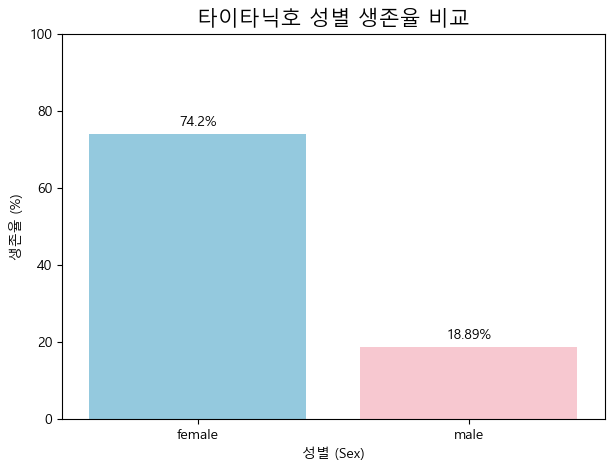

In [16]:
# 시각화 (막대 그래프)
plt.figure(figsize=(7, 5))
sns.barplot(x='Sex', y='Survived', data=survival_by_sex, palette=['skyblue', 'pink'])
plt.title('타이타닉호 성별 생존율 비교', fontsize=15)
plt.xlabel('성별 (Sex)')
plt.ylabel('생존율 (%)')
plt.ylim(0, 100)
# 막대 위에 생존율 숫자를 표시합니다.
for index, row in survival_by_sex.iterrows():
    plt.text(index, row['Survived'] + 2, f"{row['Survived']}%", color='black', ha="center")
plt.show()

여성의 생존율이 남성보다 현저하게 높음이 확인됩니다.

### 객실 등급에 따른 생존율 분석

In [17]:
# 객실 등급으로 그룹화하여 생존율을 계산합니다.
survival_by_pclass = df.groupby('Pclass')['Survived'].mean().reset_index()
survival_by_pclass['Survived'] = (survival_by_pclass['Survived'] * 100).round(2)
survival_by_pclass

,Pclass,Survived
0,1,62.96
1,2,47.28
2,3,24.24


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_20408\132178453.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Pclass', y='Survived', data=survival_by_pclass, order=[1, 2, 3], palette='viridis')


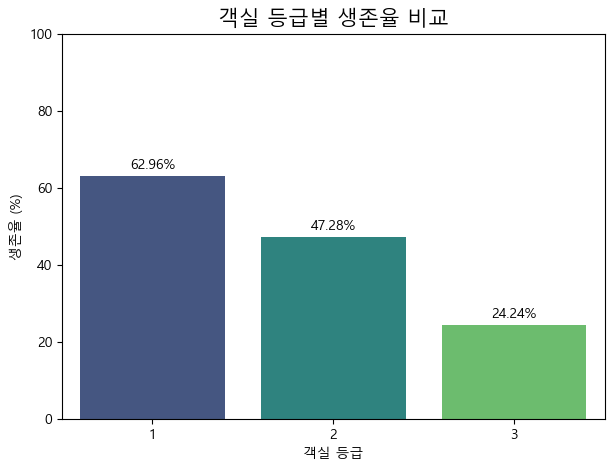

In [18]:
# 시각화 (막대 그래프)
plt.figure(figsize=(7, 5))
# Pclass를 정수 순서대로 정렬하여 시각화합니다.
sns.barplot(x='Pclass', y='Survived', data=survival_by_pclass, order=[1, 2, 3], palette='viridis')
plt.title('객실 등급별 생존율 비교', fontsize=15)
plt.xlabel('객실 등급')
plt.ylabel('생존율 (%)')
plt.ylim(0, 100)
# 막대 위에 생존율 숫자를 표시합니다.
for index, row in survival_by_pclass.iterrows():
    plt.text(index, row['Survived'] + 2, f"{row['Survived']}%", color='black', ha="center")
plt.show()

1등석 승객의 생존율이 가장 높고, 3등석 승객의 생존율이 가장 낮음이 확인됩니다.

### 나이 분포와 생존 여부 (히스토그램)

In [ ]:
# 간단한 전처리: 나이(Age)의 결측치를 전체 평균 나이로 채웁니다.
# 이는 데이터 분석의 전처리 과정을 간략하게 시연하기 위함입니다.
df['Age'] = df['Age'].fillna(df['Age'].mean())

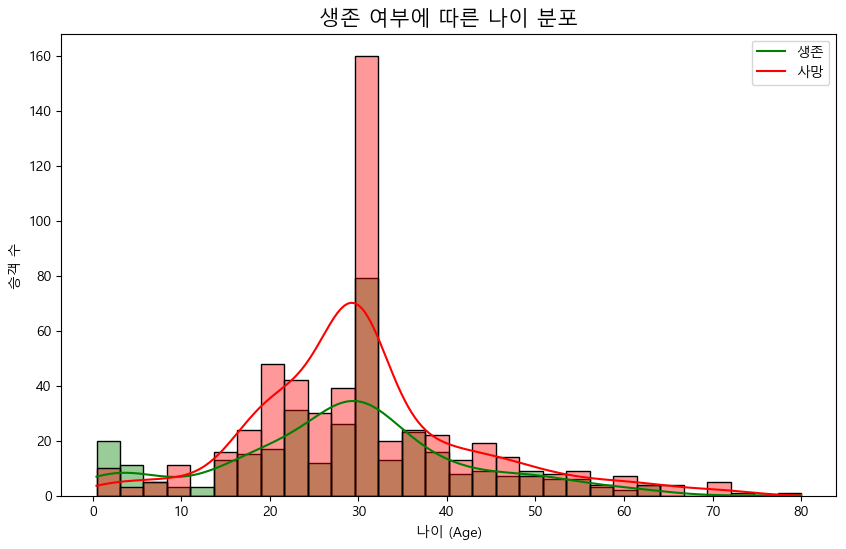

In [20]:
# 시각화 (히스토그램: 생존/사망 그룹의 나이 분포 비교)
plt.figure(figsize=(10, 6))
# 'hue' 옵션을 사용하여 'Survived' (생존 여부)에 따라 분포를 분리합니다.
sns.histplot(
    data=df, 
    x='Age', 
    hue='Survived', 
    bins=30, 
    palette={0: 'red', 1: 'green'},
    kde=True, # KDE(밀도 곡선)
    alpha=0.4  # <-- alpha 값을 낮추어 투명도를 높임 (0.0: 완전 투명, 1.0: 완전 불투명)
    # kde=False, # 나란히 배치할 경우 KDE(밀도 곡선)는 보통 제외합니다.
    # multiple='dodge' # <-- 막대를 겹치지 않고 나란히 배치
    # multiple='stack' # <-- 막대를 누적하여 배치
)
plt.title('생존 여부에 따른 나이 분포', fontsize=15)
plt.xlabel('나이 (Age)')
plt.ylabel('승객 수')
plt.legend(labels=['생존', '사망'])
plt.show()

어린 나이(0~10세) 구간에서 생존자(초록색)가 사망자(빨간색)보다 상대적으로 높게 나타남을 관찰할 수 있습니다.

### 파생 변수 생성 및 분석

데이터 분석의 응용 단계로, 기존 정보를 조합하여 새로운 의미를 가지는 특성(FamilySize)을 만들고 분석합니다.

In [21]:
# 파생 변수 생성: 가족 규모 (FamilySize)
# SibSp(형제/배우자) + Parch(부모/자녀) + 본인(1)을 더하여 가족 규모를 계산합니다.
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df[['SibSp', 'Parch', 'FamilySize', 'Survived']].head()

,SibSp,Parch,FamilySize,Survived
0,1,0,2,0
1,1,0,2,1
2,0,0,1,1
3,1,0,2,1
4,0,0,1,0


In [22]:
# 가족 규모별 생존율 비교
# 가족 규모로 그룹화하여 생존율을 계산합니다.
survival_by_family = df.groupby('FamilySize')['Survived'].mean().reset_index()
survival_by_family['Survived'] = (survival_by_family['Survived'] * 100).round(2)
survival_by_family

,FamilySize,Survived
0,1,30.35
1,2,55.28
2,3,57.84
3,4,72.41
4,5,20.00
5,6,13.64
6,7,33.33
7,8,0.00
8,11,0.00


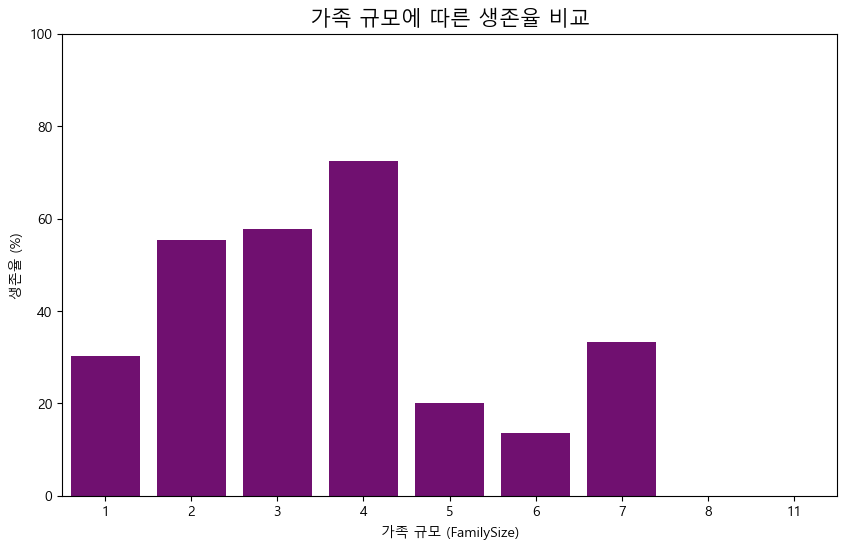

In [23]:
# 시각화 (막대 그래프)
plt.figure(figsize=(10, 6))
sns.barplot(x='FamilySize', y='Survived', data=survival_by_family, color='purple')
plt.title('가족 규모에 따른 생존율 비교', fontsize=15)
plt.xlabel('가족 규모 (FamilySize)')
plt.ylabel('생존율 (%)')
plt.ylim(0, 100)
plt.show()

+ 혼자 탑승한 승객 (FamilySize=1)의 생존율이 낮습니다.
+ 가족 규모가 2~4명인 경우 생존율이 가장 높은 경향을 보입니다.
+ 가족 규모가 매우 큰 경우 (5명 이상) 생존율이 다시 급격히 떨어집니다.
+ 결론: 너무 크지도, 너무 작지도 않은 적절한 가족 규모가 생존에 유리했음을 추론할 수 있습니다. 이는 "구명보트 탑승 시 소규모 가족 단위가 유리했을 것이다"라는 합리적인 해석을 가능하게 합니다.

### 바이올린 플롯 (Violin Plot): 나이 분포의 상세 비교

바이올린 플롯은 박스 플롯(Box Plot)과 KDE(밀도 곡선)를 결합한 형태로, 데이터의 분포 형태, 중앙값, 사분위수를 한눈에 보여주어 그룹 간 비교에 매우 효과적입니다. 특히 성별과 생존 여부에 따른 나이 분포를 동시에 분석하는 데 적합합니다.

성별(Sex) 및 생존 여부(Survived) 조합별로 나이(Age)가 어떻게 분포하는지 상세히 비교합니다.

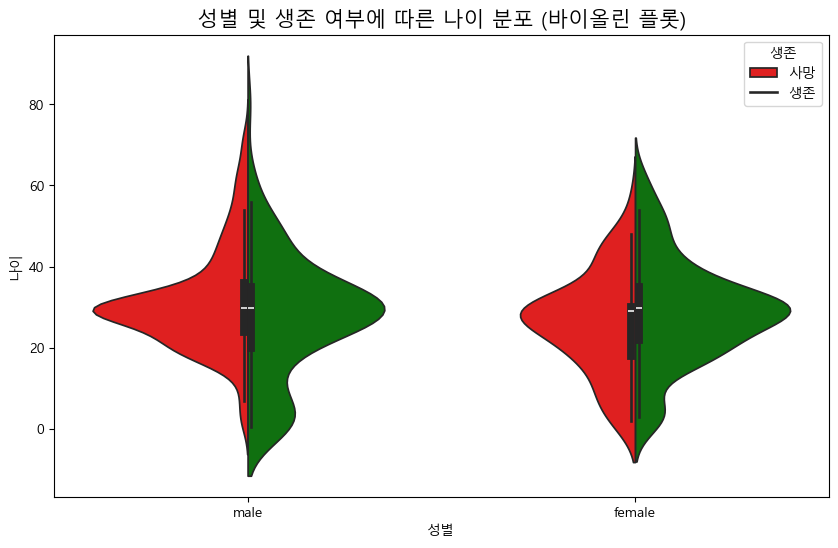

In [24]:
# 나이 결측치를 평균으로 채우는 전처리 과정을 다시 가정합니다.
# df['Age'] = df['Age'].fillna(df['Age'].mean())

plt.figure(figsize=(10, 6))
# 'Sex'를 x축으로, 'Age'를 y축으로 설정하고, 'Survived'를 hue로 사용하여 분리합니다.
sns.violinplot(
    x='Sex', 
    y='Age', 
    hue='Survived', 
    data=df, 
    split=True, # 성별 내에서 생존/사망 분포를 분리하여 표시 (시각적 대비 극대화)
    palette={0: 'red', 1: 'green'}
)
plt.title('성별 및 생존 여부에 따른 나이 분포 (바이올린 플롯)', fontsize=15)
plt.xlabel('성별')
plt.ylabel('나이')
plt.legend(title='생존', labels=['사망', '생존'])
plt.show()

+ 여성 생존: 여성(female)의 바이올린 모양이 사망자(빨간색)보다 생존자(녹색) 쪽이 전반적으로 더 두꺼운데, 이는 여성은 나이에 관계없이 생존율이 높았음을 보여줍니다.
+ 남성 생존: 남성(male)의 경우, 어린 나이(0~10세) 구간에 생존자(녹색)의 밀도가 집중되어 있으며, 중년 이후에는 사망자(빨간색)의 밀도가 훨씬 높습니다. 이는 남성은 어린 아이일 때만 생존에 유리했음을 시각적으로 강하게 시사합니다.

### 히트맵 (Heatmap): 상관관계 분석 시각화

히트맵은 데이터프레임의 모든 수치형 컬럼 쌍 사이의 상관관계를 행렬 형태로 시각화합니다. 색상의 진하기(농도)로 관계의 강도를 직관적으로 파악할 수 있어 데이터 간의 숨겨진 연관성을 찾는 데 매우 흥미롭습니다.

주요 수치형 특성들(나이, 운임, 객실 등급, 가족 규모 등)이 생존 여부와 서로 어떻게 관련되어 있는지 파악합니다.

In [25]:
# 히트맵은 수치형 데이터만 필요합니다. 필요한 컬럼만 추출하고, 결측치를 처리합니다.
# Pclass는 범주형이지만 순서형 변수로 간주하여 분석에 포함합니다.
cols_for_corr = ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'FamilySize']
corr_df = df[cols_for_corr].copy()

# 다시 Age의 결측치를 처리합니다.
corr_df['Age'] = corr_df['Age'].fillna(corr_df['Age'].mean())

# 상관 행렬 계산
corr_matrix = corr_df.corr()
corr_matrix

,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
Survived,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307,0.016639
Pclass,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500,0.065997
Age,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566,-0.248512
SibSp,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651,0.890712
Parch,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225,0.783111
Fare,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000,0.217138
FamilySize,0.016639,0.065997,-0.248512,0.890712,0.783111,0.217138,1.000000


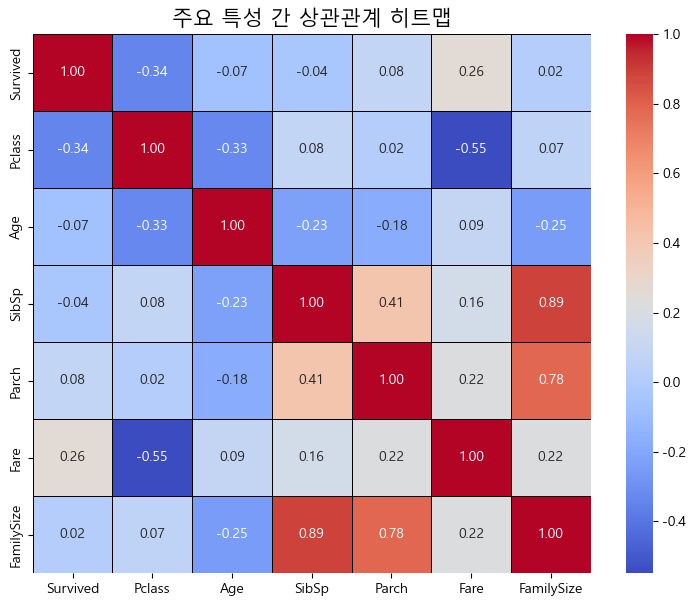

In [26]:
# 시각화 (히트맵)
plt.figure(figsize=(9, 7))
# annot=True: 셀 안에 상관계수 값을 표시, fmt='.2f': 소수점 둘째 자리까지 표시
sns.heatmap(
    corr_matrix, 
    annot=True, 
    fmt='.2f', 
    cmap='coolwarm', # 색상 팔레트 설정 (cool: 음의 상관, warm: 양의 상관)
    linewidths=.5, # 셀 간의 간격
    linecolor='black'
)
plt.title('주요 특성 간 상관관계 히트맵', fontsize=15)
plt.show()

+ Survived 행/열을 집중적으로 봅니다.
  + 강한 양의 상관관계 (밝은 색, 예: 0.2 이상): Fare (운임)가 생존율과 양의 상관관계를 가집니다. (운임이 비쌀수록 생존율이 높음)
  + 강한 음의 상관관계 (어두운 색, 예: -0.2 이하): Pclass (객실 등급)와 Age (나이)는 생존율과 음의 상관관계를 가집니다. (등급이 낮을수록, 나이가 많을수록 생존율이 낮음) 
+ 다른 관계: **Fare**와 Pclass 사이의 강한 음의 상관관계(1등석일수록 운임이 비싸므로) 등 데이터 내의 구조적 관계를 파악할 수 있습니다.